# 一般模型介紹

## 回歸
- 線性迴歸 (Linear Regression)

## 分群
- 均值分群
    - k-means
- 密度分群
    - DBSCAN

## 分類
- 決策樹 (DT)

## 維度轉換
- 主成分分析 (PCA)

## 線性迴歸

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# 載入波士頓房價資料集
boston = pd.read_csv('dataset/housing.csv')

# 獲取特徵值和目標值
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# 建立線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X_train, y_train)

# 預測結果
predictions = model.predict(X_test)

# 評估模型
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('R^2:', r2_score(y_test, predictions))


MAE: 74907.15842493459
MSE: 9873488488.137503
R^2: 0.687026296346364


In [12]:
9873488488 ** 0.5

99365.42903847394

### 注意事項

- 線性回歸是一種簡單但有效的預測方法。但是，它也有一些局限性：
    - 線性回歸模型假設因變數和自變數之間的關係是線性的。如果實際關係是非線性的，那麼線性回歸模型可能會產生不準確的預測。

## K-means

### K-means 優缺點

#### 優點

* 簡單易懂，易於實現。
* 計算速度快，適用於大規模資料集。
* 可以有效地處理非線性資料。

#### 缺點

* 需要事先指定聚類數目 K，而 K 值的選取對結果影響很大。
* 對噪聲和異常值敏感。
* 只能找到球形聚類，無法找到其他形狀的聚類。


## K-means 與 K-modes 比較

K-means 和 K-modes 都是無監督學習中的聚類算法，用於將資料分為不同的群組。

### K-means

K-means 算法是一種基於距離的聚類算法。它將資料點分為 K 個群組，使得每個資料點與其所在群組的中心點的距離最小。

**K-means 算法的步驟：**

1. 隨機選擇 K 個資料點作為初始聚類中心。
2. 對每個資料點，計算它與每個聚類中心的距離。
3. 將每個資料點分配到與其距離最小的聚類中心。
4. 重新計算每個聚類中心的平均值。
5. 重複步驟 2 到 4，直到聚類中心不再變化。

### K-modes

K-modes 算法是一種基於模式匹配的聚類算法。它將資料點分為 K 個群組，使得每個資料點與其所在群組的模式最相似。

**K-modes 算法的步驟：**

1. 隨機選擇 K 個資料點作為初始聚類模式。
2. 對每個資料點，計算它與每個聚類模式的相似度。
3. 將每個資料點分配到與其相似度最高的聚類模式。
4. 重新計算每個聚類模式的眾數。
5. 重複步驟 2 到 4，直到聚類模式不再變化。

### K-means 和 K-modes 的比較

| 特性 | K-means | K-modes |
|---|---|---|
| 適用資料類型 | 數值型 | 離散型 |
| 計算速度 | 快 | 慢 |
| 對噪聲敏感度 | 敏感 | 不敏感 |
| 對異常值敏感度 | 敏感 | 不敏感 |
| 可解釋性 | 較低 | 較高 |
| 可擴展性 | 較好 | 較差 |

### K-means 和 K-modes 的選擇

在選擇 K-means 和 K-modes 時，需要考慮以下因素：

* 資料的類型
* 資料量
* 對聚類結果的準確性要求
* 對聚類結果的可解釋性要求

### 範例

* **K-means**：K-means 算法可以用於客戶群體細分。例如，一家公司可以使用 K-means 算法將其客戶分為不同的群組，以便更好地瞭解每個群組的需求。
* **K-modes**：K-modes 算法可以用於文本分類。例如，K-modes 算法可以用於將新聞文章分為不同的類別，例如體育、政治和商業


## K-means 注意事項

1. 資料歸一化：在使用 K-means 算法之前，需要對資料進行歸一化，以確保每個特徵的尺度相同。
2. 選擇 K 值：K 值的選擇會影響聚類結果。通常可以使用肘部法或輪廓系數來選擇 K 值。
3. 處理噪聲和異常值：K-means 算法對噪聲和異常值敏感。因此，在使用 K-means 算法之前，需要對噪聲和異常值進行處理。

/Users/hongyicheng/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


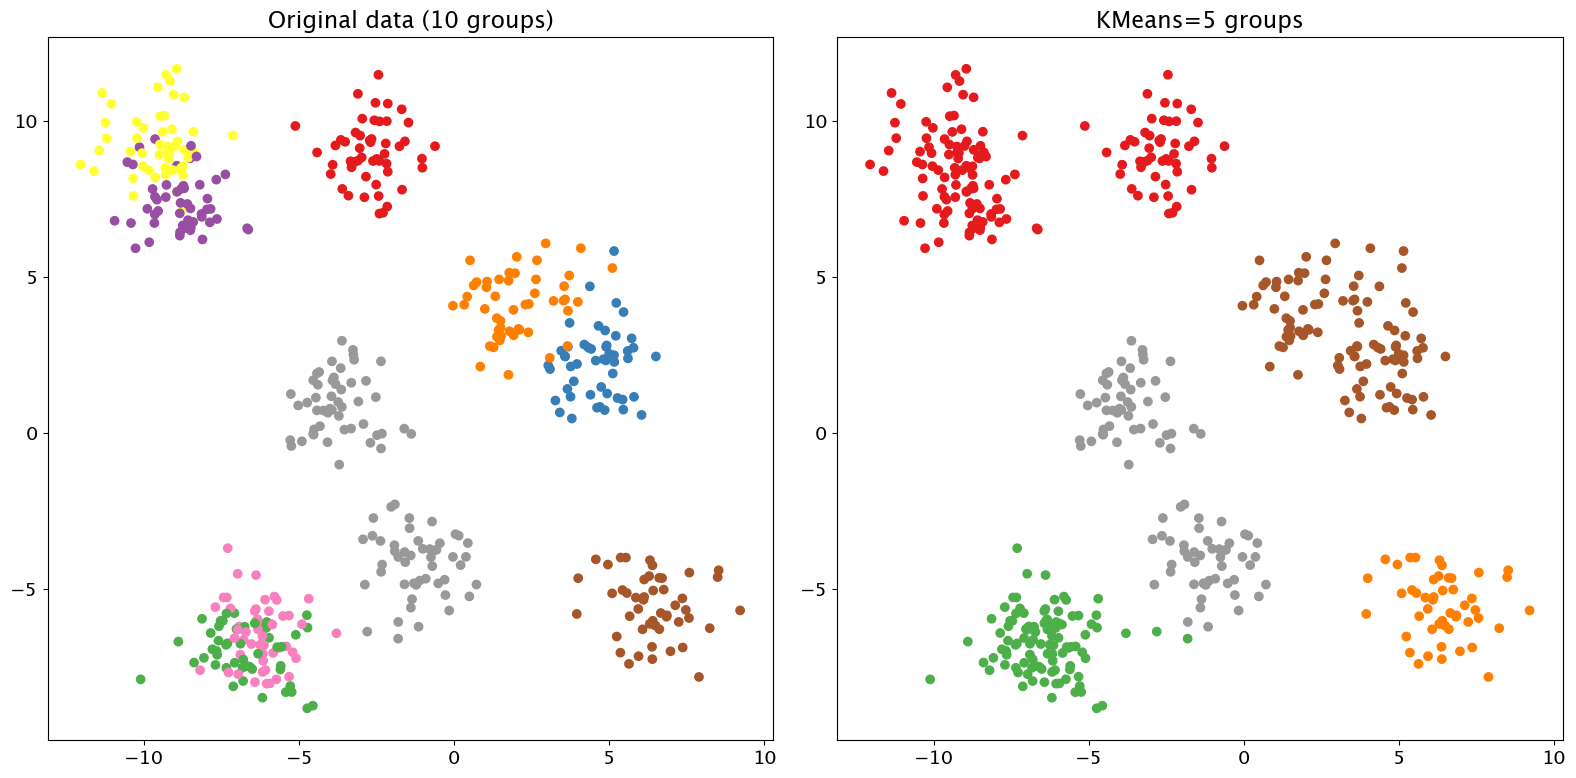

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 隨機產生 10 組 2 features 的資料 500 筆 (dy 即原始目標值 label 0~9)
dx, dy = make_blobs(n_samples=500, n_features=2, centers=10, random_state=42)
# dx
# 用 KMeans 在資料中找出 5 個分組
kmeans = KMeans(n_clusters=5)
kmeans.fit(dx)
# 預測新的目標值 label
new_dy = kmeans.predict(dx)


plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
# 以不同顏色畫出原始的 10 群資料
plt.subplot(121)
plt.title('Original data (10 groups)')
plt.scatter(dx.T[0], dx.T[1], c=dy, cmap=plt.cm.Set1)
# 根據重新分成的 5 組來畫出資料
plt.subplot(122)
plt.title('KMeans=5 groups')
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set1)
# 顯示圖表
plt.tight_layout()
plt.show()

/Users/hongyicheng/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hongyicheng/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


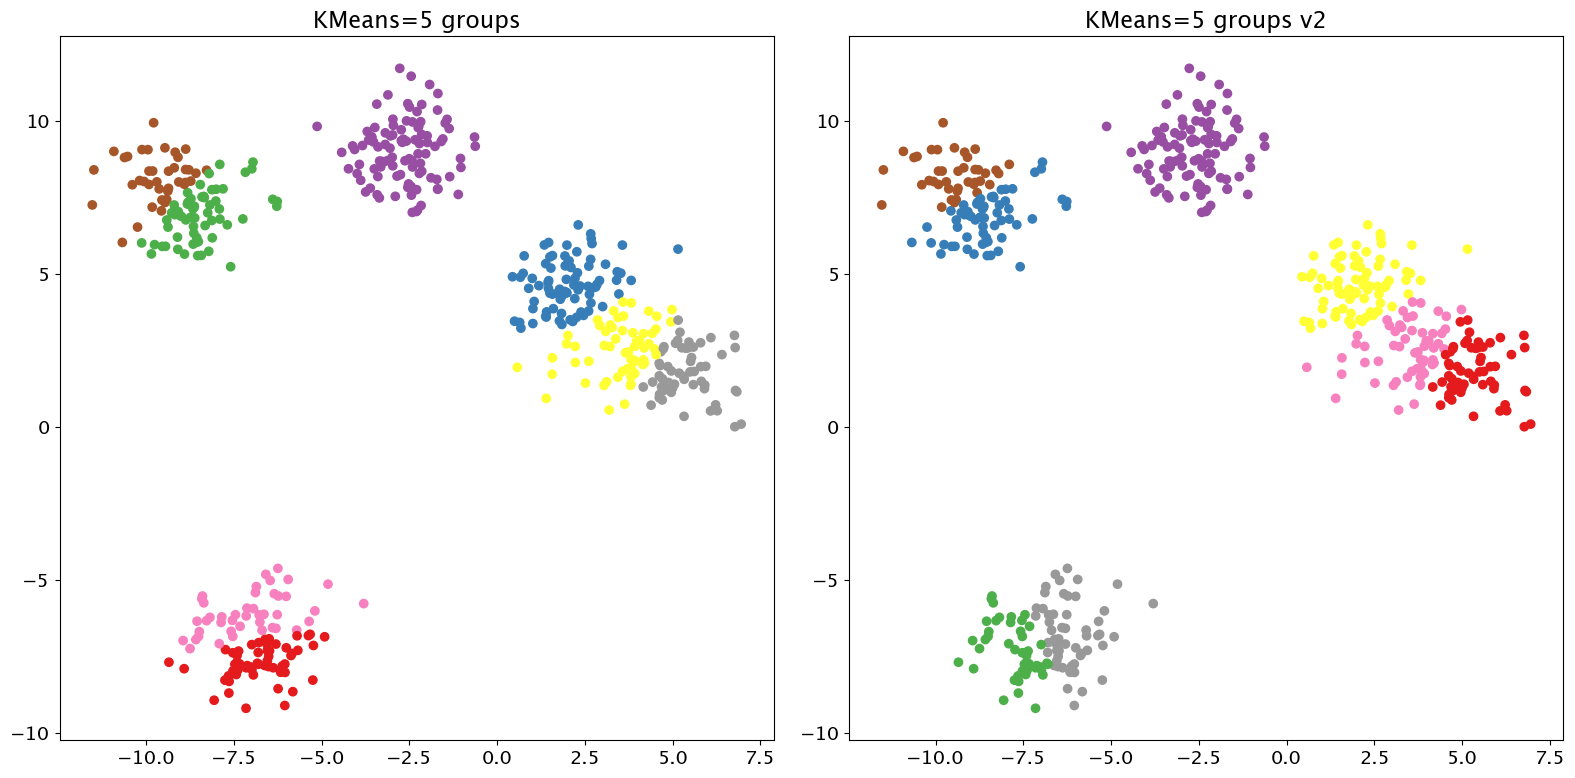

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 隨機產生 10 組 2 features 的資料 500 筆 (dy 即原始目標值 label 0~9)
dx, dy = make_blobs(n_samples=500, n_features=2, centers=5, random_state=42)
# 用 KMeans 在資料中找出 5 個分組
kmeans = KMeans(n_clusters=8)
kmeans.fit(dx)
# 預測新的目標值 label
new_dy = kmeans.predict(dx)
plt.rcParams['font.size'] = 14
plt.figure(figsize=(16, 8))
# 以不同顏色畫出原始的 10 群資料
plt.subplot(121)
plt.title('Original data (10 groups)')
# plt.scatter(dx.T[0], dx.T[1], c=dy, cmap=plt.cm.Set1)

kmeans = KMeans(n_clusters=8)
kmeans.fit(dx)
new_dy2 = kmeans.predict(dx)

# 根據重新分成的 5 組來畫出資料
plt.subplot(121)
plt.title('KMeans=5 groups')
plt.scatter(dx.T[0], dx.T[1], c=new_dy, cmap=plt.cm.Set1)
plt.subplot(122)
plt.title('KMeans=5 groups v2')
plt.scatter(dx.T[0], dx.T[1], c=new_dy2, cmap=plt.cm.Set1)
# 顯示圖表
plt.tight_layout()
plt.show()

## DBSCAN 算法介紹

**DBSCAN** 全名為 **Density-Based Spatial Clustering of Applications with Noise**，是一種基於密度的聚類算法。DBSCAN 的工作原理是根據資料點之間的距離來確定它們是否屬於同一群集。

## DBSCAN 的優點

* DBSCAN 是一種無監督學習算法，不需要預先標註的資料。
* DBSCAN 可以處理噪聲和異常值。
* DBSCAN 可以發現任意形狀的群集。

## DBSCAN 的缺點

* DBSCAN 的計算複雜度較高。
* DBSCAN 對參數的設定比較敏感。
* DBSCAN 不適用於具有大量噪聲的資料集。

## DBSCAN 的適用情境

* DBSCAN 適用於資料點之間的距離具有較強相關性的資料集。
* DBSCAN 適用於需要發現任意形狀群集的資料集。
* DBSCAN 適用於對噪聲和異常值不敏感的資料集。


## DBSCAN 的參數

* `eps`: 控制群集之間的最小距離。
* `min_samples`: 控制每個群集中至少包含的資料點數量。

## 調整 DBSCAN 參數的技巧

* 使用不同的 `eps` 和 `min_samples` 值進行實驗，以找到最佳參數組合。
* 使用視覺化方法來幫助評估參數的影響。

## 總結

DBSCAN 是一種有效的聚類算法，具有許多優點。但是，DBSCAN 也有一些缺點和限制。在使用 DBSCAN 之前，您應該了解其優缺點和適用情境。

## 參考文獻

* [DBSCAN - 維基百科，自由的百科全書](https://zh.wikipedia.org/wiki/DBSCAN)

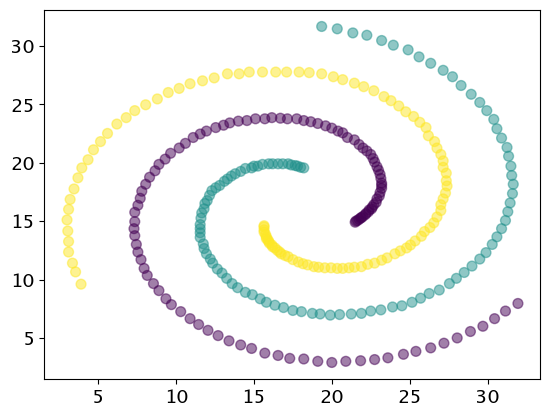

In [58]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = arff.loadarff('dataset/3-spiral.arff')
df = pd.DataFrame(data[0])

# 設定 DBSCAN 參數
eps = 3
min_samples = 5

# 訓練 DBSCAN 模型
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(df[["x", "y"]])


# 視覺化聚類結果
plt.scatter(df["x"], df["y"], c=labels, s=50, alpha=0.5)
plt.show()

## 階層式分群
- [學習資源](https://ithelp.ithome.com.tw/m/articles/10334001)
- [延伸閱讀](http://mirlab.org/jang/books/dcpr/dcHierClustering.asp?title=3-2%20Hierarchical%20Clustering%20(%B6%A5%BCh%A6%A1%A4%C0%B8s%AAk)&language=chinese)

## 階層式分群

階層式分群是一種自下而上的分群算法。它首先將每個樣本視為一個群集，然後逐步合併相似的群集，直到形成所需數量的群集。

### 優點

* 簡單易懂，易於實現。
* 不需要對數據進行假設。
* 可以處理任意形狀的數據。

### 缺點

* 計算量較大，尤其是當數據集很大時。
* 對噪聲敏感。
* 分群結果對聚合方式和距離度量的選擇很敏感。

### 與其他分群算法的比較

| 分群算法 | 優點 | 缺點 |
|---|---|---|
| 階層式分群 | 簡單易懂，易於實現，不需要對數據進行假設，可以處理任意形狀的數據 | 計算量較大，對噪聲敏感，分群結果對聚合方式和距離度量的選擇很敏感 |
| K-means 分群 | 簡單易懂，易於實現，計算量較小 | 需要對數據進行假設，不適合處理任意形狀的數據，對初始聚類中心敏感 |
| DBSCAN 分群 | 可以處理任意形狀的數據，對噪聲不敏感 | 需要對數據進行假設，計算量較大 |


In [19]:
# 載入數據
from sklearn.datasets import load_iris

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# # 特徵數據
# X = iris.data

# # 標籤數據
# y = iris.target

# 使用階層式分群進行分群
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5, linkage='average')

# 訓練模型
clustering.fit(X_test)

# 分群結果
labels = clustering.labels_

# 打印分群結果
print(labels)


[2 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 4 2 0 1 2 1 2 1 2 0 0 1 4 1 0 0 0 3 1 2
 0]


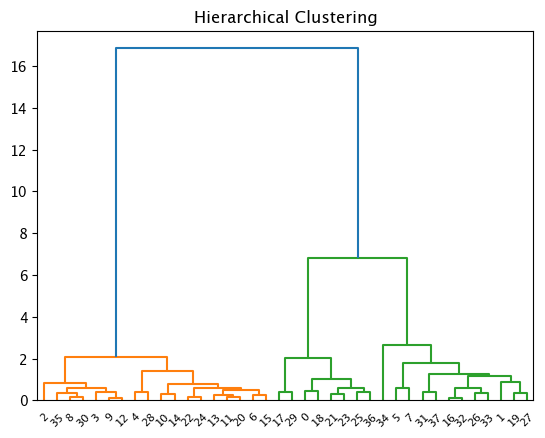

In [24]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dis=sch.linkage(X_test,metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

## KNN 算法
聽起來跟 k-means 很像但是他們是完全不一樣的東西

KNN 算法是一種簡單有效的機器學習算法。它通過計算新數據點與訓練集中的數據點的距離來進行分類或迴歸。

!! 注意 KNN 是一個分類器，不是分群的工具

### KNN 算法的工作原理

KNN 算法的工作原理可以分為以下幾個步驟：

1. **計算新數據點與訓練集中每個數據點的距離。**
2. **根據距離大小對訓練集中的數據點進行排序。**
3. **選擇距離最近的 K 個數據點。**
4. **對 K 個數據點的類別進行投票。**
5. **將投票結果作為新數據點的類別。**

### KNN 算法的優點

* KNN 算法簡單易懂，易於實現。
* KNN 算法不需要對數據進行假設。
* KNN 算法適用於多種分類和迴歸任務。

### KNN 算法的缺點

* KNN 算法的計算量較大，尤其是當訓練集很大時。
* KNN 算法容易受到噪聲的影響。
* KNN 算法的性能對鄰居數的選擇很敏感。

In [7]:
# 載入數據
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# 訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# 建立 KNN 模型
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 訓練模型
knn.fit(X_train, y_train)

# 預測
y_pred = knn.predict(X_test)

# 評估
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

# 打印準確率
print(accuracy)


0.9473684210526315


## 決策樹 (DT) 介紹

**決策樹** (Decision Tree) 是一種機器學習算法，可以用於分類和回歸。決策樹的結構類似於流程圖，由內節點、葉節點和連線組成。內節點表示決策，葉節點表示決策結果。決策樹的學習過程就是構建一個能夠對資料進行準確預測的樹形結構。

## 決策樹的優點

* 決策樹易於理解和解釋。
* 決策樹可以處理多維資料。
* 決策樹具有較強的魯棒性。

## 決策樹的缺點

* 決策樹的計算複雜度較高。
* 決策樹容易過擬合。
* 決策樹不適用於具有大量噪聲的資料集。

## 決策樹的適用情境

* 決策樹適用於資料具有明確的因果關係的資料集。
* 決策樹適用於需要對決策過程進行解釋的資料集。
* 決策樹適用於對計算資源有限的環境。


## 決策樹的算法

決策樹的算法主要包括以下步驟：

1. **特徵選擇**：選擇最有利於決策的特徵。
2. **信息增益**：計算每個特徵的信息增益。
3. **決策樹構建**：根據信息增益遞歸地構建決策樹。
4. **決策樹剪枝**：剪枝過擬合的決策樹。

## 如何避免決策樹的過擬合
### 過擬合 (overfitting) 是決策樹學習中常見的一個問題。過擬合是指決策樹在訓練集上表現良好，但在驗證集或測試集上表現不佳。

避免決策樹過擬合的方法主要有以下幾種：
- 剪枝(pruning)
- 正則化 (regularization)

### 剪枝
剪枝是一種通過刪除決策樹中不重要的分支來防止過擬合的方法。剪枝的基本思想是刪除那些對決策樹的整體性能影響不大的分支，以降低決策樹的複雜度。

剪枝有以下兩種常用的方法：

1. 預剪枝 (pre-pruning)：在決策樹構建的過程中進行剪枝。
2. 後剪枝 (post-pruning)：在決策樹構建完成後進行剪枝。

### 正則化
正則化是一種通過向決策樹的損失函數中添加正則化項來防止過擬合的方法。正則化項可以懲罰決策樹的複雜度，從而降低決策樹過擬合的風險。

正則化有以下兩種常用的方法：

1. L1 正則化：向決策樹的損失函數中添加 L1 正則化項。
2. L2 正則化：向決策樹的損失函數中添加 L2 正則化項。

### 其他方法
除了上述方法之外，還有一些其他方法可以防止決策樹過擬合，例如：

1. 使用更大的訓練集：更大的訓練集可以提高決策樹的泛化能力，從而降低過擬合的風險。
2. 使用數據增強：數據增強可以增加訓練集的樣本數量和多樣性，從而降低過擬合的風險。
3. 使用 ensemble 方法：ensemble 方法可以將多個決策樹的結果進行組合，從而降低過擬合的風險。

## 總結
過擬合是決策樹學習中常見的一個問題。可以通過提前停止、剪枝、正則化等方法來防止決策樹過擬合。在實際應用中，可以根據具體情況選擇合適的方法來防止決策樹過擬合。



In [62]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 載入鳶尾花資料集
iris = datasets.load_iris()

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# 建立決策樹分類器
clf = DecisionTreeClassifier()

# 訓練決策樹
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 評估模型
print("準確率:", accuracy_score(y_test, y_pred))


準確率: 0.9736842105263158


In [65]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 載入鳶尾花資料集
iris = datasets.load_iris()

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# 建立決策樹分類器
clf = DecisionTreeClassifier(max_depth=5) # 這邊有去限制最大深度也就是預先剪枝的方式

# 使用交叉驗證評估模型
scores = cross_val_score(clf, X_train, y_train, cv=5)

# 輸出平均準確率
print("平均準確率:", scores.mean())


平均準確率: 0.9640316205533598


## criterion 
- criterion 參數用於指定決策樹的分割準則。它有兩個可選值：

    - "entropy"：使用信息熵
    - "gini"：使用基尼係數
### 信息熵

信息熵是一種衡量數據集混亂程度的指標。信息熵越高，數據集越混亂。

在決策樹中，我們希望在每個分割後數據集的混亂程度都會降低。因此，我們可以使用信息熵來選擇最佳的分割點。

### 基尼係數

基尼係數也是一種衡量數據集混亂程度的指標。基尼係數越高，數據集越混亂。

在決策樹中，我們希望在每個分割後數據集的基尼係數都會降低。因此，我們可以使用基尼係數來選擇最佳的分割點。

### 兩個指標的比較

信息熵和基尼係數都是常用的決策樹分割準則。兩種指標在實際應用中的效果差異不大。

在一般情況下，可以使用默認值 "gini"。如果數據集的噪聲較大，可以使用 "entropy"。

In [73]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# 載入鳶尾花資料集
iris = datasets.load_iris()

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# 建立決策樹分類器
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, ccp_alpha=0.1) 
# ccp_alpha 這個部分也有類似於正則化的效果
# criterion 可以使用不同種的決策方法

# 訓練決策樹
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

# 評估模型
print("準確率:", accuracy_score(y_test, y_pred))


準確率: 0.9736842105263158


### 其他可以設定避免 overfitting 的參數

min_samples_split：每個內節點分裂所需的最小樣本數

min_samples_leaf：每個葉節點所需的最小樣本數

max_features：每個分割中考慮的最大特徵數

## 主成分分析 (PCA)

### 目的：
把很多變數（維度）濃縮成幾個重要的變數（主成分）

### 方法：
把資料投射到新的方向（主成分）

### 注意事項：
資料要線性相關
要先標準化
要選取重要的主成分
- [詳細瞭解 PCA](https://leemeng.tw/essence-of-principal-component-analysis.html)

### PCA 範例
假設我們有一份調查問卷，調查了 100 位受訪者的 5 個項目：

1. 年齡
2. 性別
3. 收入
4. 教育程度
5. 職業

- 我們可以用 PCA 來把這 5 個項目濃縮成幾個重要的變數。
- 例如，第一個主成分可能是「社會經濟地位」，它由年齡、收入和教育程度三個項目組成。

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# 載入 iris 資料集
iris = load_iris()

# 建立 PCA 和 FA 模型
pca = PCA(n_components=2)

# 將資料套用在 PCA 和 FA 模型上
pca_result = pca.fit_transform(iris.data)

# 輸出 PCA 和 FA 的結果
print("PCA 結果：")
print(pca_result)

# 如果前幾個主成分或因子的解釋方差累計起來超過 80%，則可以認為 PCA 結果是好的。
print(pca.explained_variance_ratio_.cumsum())

PCA 結果：
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.599

## Random Forest Tree

Random Forest Tree，是一種由多棵決策樹組成的分類器。它屬於集成學習算法的一種，其基本思想是通過訓練多個決策樹，然後將這些決策樹的預測結果進行組合，以提高最終的預測準確率。

### RFT 的工作原理

RFT 的工作原理可以分為以下幾個步驟：

1. 從訓練集中隨機抽取多個子集。
2. 對每個子集，使用決策樹算法訓練一棵決策樹。
3. 對新的數據，使用所有決策樹進行預測。
4. 將所有決策樹的預測結果進行組合，得到最終的預測結果。

### RFT 的優點

- RFT 具有較高的準確率。
- RFT 可以有效地防止過擬合。
- RFT 可以處理高維數據。


### 原理
- **集成學習**：RFT 是一種集成學習算法，它通過訓練多個決策樹，然後將這些決策樹的預測結果進行組合，

In [7]:
# 載入數據
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()

# 特徵數據
X = iris.data

# 標籤數據
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 建立 RandomForestTree 分類器
model = RandomForestClassifier(n_estimators=100)

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

# 打印準確率
print(accuracy)

0.8421052631578947
